<h1 style="text-align: center;">PROJECT NEO AISSYR</h1>

<img 
    style="display: block; 
           margin-left: auto;
           margin-right: auto;
           width: 40%;"
    src="https://images.unsplash.com/photo-1595933706873-4871fe63da39?q=80&w=3544&auto=format&fit=crop&ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D"
    alt="cuneiform illustration">
</img>

<h3 style="margin-left: 80px; font-style: bold;">ABSTRACT : FR - EN</h3>
<p style="text-align: justify; margin-left: 80px; margin-right: 80px;">
Neo AISSYR est une <b>web application</b> permettant aux chercheurs, spécialistes ou curieux de l'empire Assyrien, de transcrire les tablettes en cunéiforme de la période dite Néo-Assyrienne s'étendant entre 900 et 600 ans avant notre ère.

<p style="text-align: center;">-*-</p>
<p style="text-align: justify; margin-left: 80px; margin-right: 80px;">
Neo AISSYR is a <b>web application</b> enabling researchers, specialists or those curious about the Assyrian Empire, to transcribe cuneiform tablets from the so-called Neo-Assyrian period stretching from 900 to 600 BC.

</br>

<p style="text-align: center;">-*-</p>
<h4 style="margin-left: 80px; font-style: bold;">Source dataset</h4>
<p style="text-align: justify; margin-left: 80px; margin-right: 80px;">
<a href="https://github.com/CompVis/cuneiform-sign-detection-dataset">Github Dataset</a></p>
<p style="text-align: justify; margin-left: 80px; margin-right: 80px;">
Introduit dans : <em>Dencker, T., Klinkisch, P., Maul, S. M., and Ommer, B. (2020): Deep Learning of Cuneiform Sign Detection with Weak Supervision using Transliteration Alignment, PLOS ONE, 15:12, pp. 1–21</em> <a href="https://doi.org/10.1371/journal.pone.0243039">article link</a></p>

---


<h4 style="text-align: center;">NOTEBOOK PARTIE 1 - PART 1</h4>
<p style="text-align: center; font-style: italic">~~ ANALYSE EXPLORATOIRE DU DATASET - DATASET EDA ~~</p>
</br>

<p style="text-align: justify; margin-left: 80px; margin-right: 80px;">
Ce projet s'appuie sur le dataset présenté dans l'article <em>Dencker, T., Klinkisch, P., Maul, S. M., and Ommer, B. (2020): Deep Learning of Cuneiform Sign Detection with Weak Supervision using Transliteration Alignment, PLOS ONE, 15:12, pp. 1–21</em> est disponible sur <a href="https://github.com/CompVis/cuneiform-sign-detection-dataset">Github</a>. L'ensemble des données repose sur plus de 1800 images de tablettes d'argile de l'époque néo-assyrienne de l'écriture cunéiforme (900 - 600 ans AV. N. È.). Le dataset, fournit les Bounding Box de 8109 signes labellisés en 189 classes, réparties sur 81 tablettes.</p>

<p style="text-align: justify; margin-left: 80px; margin-right: 80px;">
Le présent notebook permet de télécharger les fichiers en vue d'initier, dans un second temps, l'analyse exploratoire du dataset.
</p>

</br>

<h3 style="text-align: justify; margin-left: 40px; margin-right: 80px;">
<b>Sommaire</b>
</h3>


<span style="margin-left: 80px;">- Récupérer le dataset</span></br>
<span style="margin-left: 80px;">- Suppression des fichiers/dossiers inutiles</span></br>
<span style="margin-left: 80px;">- EDA du dossier 'Annotations'</span></br>
<span style="margin-left: 80px;">- Résumé de l'EDA</span></br>
<span style="margin-left: 80px;">- Prochaines étapes</span></br>
<span style="margin-left: 80px;">- Suppression des fichiers restants</span></br>
<span style="margin-left: 80px;">- Webscraping des Glyphes</span>

</br>

---
</br>

In [9]:
## -- General Import
import git
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import re
import seaborn as sns
import shutil
import warnings

## -- Option
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')

%matplotlib inline

## Récupérer le dataset depuis github

In [53]:
GIT_REPO = "https://github.com/CompVis/cuneiform-sign-detection-dataset.git"
FOLDER_PATH = '../data'

In [54]:
try:
    git.Repo.clone_from(GIT_REPO, 
                        FOLDER_PATH,
                        branch='master')
except Exception as e:
    print(f"Error : {e}")

Error : Cmd('git') failed due to: exit code(128)
  cmdline: git clone -v --branch=master -- https://github.com/CompVis/cuneiform-sign-detection-dataset.git ../data
  stderr: 'fatal: destination path '../data' already exists and is not an empty directory.
'


## Suppression des Fichiers et Dossiers inutiles

<p style="text-align: justify; margin-left: 80px; margin-right: 80px;">
Une fois le répertoire téléchargé, il est recommandé d'analyser sa structure en vue de supprimer d'éventuels éléments inutiles.  
</p>

In [55]:
!rptree -d '../data'

../data/
│
├── annotations/
│
├── images/
│   │
│   ├── CDLI/
│   │
│   └── VAT/
│
│
└── segments/


<p style="text-align: justify; margin-left: 80px; margin-right: 80px;">
Suite à ce premier examen, le dossier .git n'étant pas nécessaire, il est recommandé de le supprimer. 
<p>

In [56]:
HIDDEN_GIT_PATH = '../data/.git'

try:
    shutil.rmtree(HIDDEN_GIT_PATH)
except Exception as e:
    print(f"Error : {e}")

Error : [Errno 2] No such file or directory: '../data/.git'


<p style="text-align: justify; margin-left: 80px; margin-right: 80px;">
À la suite de la suppresion, l'examen va se porter cette fois-ci sur les fichiers
</p>

In [57]:
!rptree '../data'

../data/
│
├── annotations/
│   ├── bbox_annotations_test_full.csv
│   └── bbox_annotations_train_full.csv
│
├── images/
│   │
│   ├── CDLI/
│   │   ├── BM099070.jpg
│   │   ├── K01057.jpg
│   │   ├── K08396.jpg
│   │   ├── ND02486.jpg
│   │   ├── P239304.jpg
│   │   ├── P313634.jpg
│   │   ├── P314346.jpg
│   │   ├── P314355.jpg
│   │   ├── P333952.jpg
│   │   ├── P334311.jpg
│   │   ├── P334357.jpg
│   │   ├── P334828.jpg
│   │   ├── P334831.jpg
│   │   ├── P334836.jpg
│   │   ├── P334839.jpg
│   │   ├── P334842.jpg
│   │   ├── P334848.jpg
│   │   ├── P334863.jpg
│   │   ├── P334865.jpg
│   │   ├── P334892.jpg
│   │   ├── P334894.jpg
│   │   ├── P334896.jpg
│   │   ├── P334921.jpg
│   │   ├── P334926.jpg
│   │   ├── P334932.jpg
│   │   ├── P335561.jpg
│   │   ├── P335575.jpg
│   │   ├── P335593.jpg
│   │   ├── P335597.jpg
│   │   ├── P335598.jpg
│   │   ├── P335605.jpg
│   │   ├── P335608.jpg
│   │   ├── P335646.jpg
│   │   ├── P335650.jpg
│   │   ├── P335651.jpg
│   │   ├── P335652.

<p style="text-align: justify; margin-left: 80px; margin-right: 80px;">
Ce deuxième examen montre que certains éléments, tels que les fichiers README, config, etc ou encore le dossier test présent dans "images" ne sont également pas utiles.  
Il seront ainsi supprimer pour de garder un environnement de travail propice à la suite.
<p>

In [58]:
DELETE_FILES_PATH = ['../data/_config.yml', 
                     '../data/Cuneiform_Sign_Detection_Dataset_Introduction.ipynb',
                     '../data/README.md']

try:
    ## - delete 'test' folder in 'images'
    shutil.rmtree('../data/images/test/')

    ## - delete _config.yml, notebook and readme
    for file in DELETE_FILES_PATH:
        os.remove(file)

except Exception as e:
    print(f"Error : {e}")

Error : [Errno 2] No such file or directory: '../data/images/test/'


<p style="text-align: justify; margin-left: 80px; margin-right: 80px;">
Ce deuxième examen permet également de mettre en lumière trois sous-dossiers, dans lesquels les fichiers CSV sont répartis.
<p>

<p style="text-align: justify; margin-left: 100px; margin-right: 80px;"><b>- Annotations : </b>contient les fichiers csv des bbox des signes pour les 81 tablettes, et les fichiers csv pour délimiter les lignes (1er signe au dernier signe)</p>  

<p style="text-align: justify; margin-left: 100px; margin-right: 80px;"><b>- Segments : </b>contient les fichiers csv pour recadrer les tablettes sur le segment étudié</p>  

<p style="text-align: justify; margin-left: 100px; margin-right: 80px;"><b>- Transliterations : </b>contient les fichiers csv pour faire le lien entre les signes et les transliterations d'Oracc</p>


<p style="text-align: justify; margin-left: 80px; margin-right: 80px;">
Pour les besoins du projet, seul le dossier "annotations" sera exploité. En effet, le dossier 'segments' n'étant que les dimensions pour le recadrage des images, celui-ci n'apporte pas d'information pertinente pour l'EDA, tandis que le dossier "Transliterations" sera supprimé. Ce dernier faisant le lien avec des fichiers indisponibles provenant d'Oracc, les fichiers CSV dans leur état actuel ne sont donc plus exploitables.
</p>

In [59]:
## - Delete Folder "Transliterations"
try:
    shutil.rmtree("../data/transliterations/")
except Exception as e:
    print(f"Error : {e}")

Error : [Errno 2] No such file or directory: '../data/transliterations/'


## Analyse Exploratoire du Dossier Annotations

<p style="text-align: justify; margin-left: 80px; margin-right: 80px;">
À présent l'analyse portera sur le dossier "Annotations". Plus haut, il a été observé que ce dernier comportait deux types de fichiers csv, les "bbox_annotations_*" et les "line_annotations". Les seconds sert à délimiter le début et la fin des lignes sur la tablette, en prenant le premier et le dernier symboles de chaque ligne. L'analyse ne portera pas dessus, selon les besoins initiaux du projet. 
</p>

<p style="text-align: justify; margin-left: 80px; margin-right: 80px;">
<em>Pour réduire l'EDA, le choix a été fait de se concentrer sur les fichiers "bbox_annotations_train_full" et "bbox_annotations_test_full", utilisés comme références pour la suite. Ce choix est fait afin de réunir, si besoin, les deux dataframes, dans le but de créer un autre train/test</em>
</p>

#### ---- bbox_annotations_train_full

In [10]:
df_bb_ann_train = pd.read_csv('../data/annotations/bbox_annotations_train_full.csv')

In [33]:
df_bb_ann_train.head()

,segm_idx,tablet_CDLI,view_desc,collection,mzl_label,train_label,bbox,relative_bbox
0,2061,P334894,Obv,saa05,839,11,"[805, 1979, 871, 2055]","[165, 60, 231, 136]"
1,2061,P334894,Obv,saa05,110,4,"[860, 1988, 981, 2049]","[220, 69, 341, 130]"
2,2061,P334894,Obv,saa05,18,210,"[811, 2056, 948, 2133]","[171, 137, 308, 214]"
3,2061,P334894,Obv,saa05,24,58,"[927, 2059, 1046, 2131]","[287, 140, 406, 212]"
4,2061,P334894,Obv,saa05,812,82,"[804, 2136, 908, 2220]","[164, 217, 268, 301]"


In [34]:
df_bb_ann_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4708 entries, 0 to 4707
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   segm_idx       4708 non-null   int64 
 1   tablet_CDLI    4708 non-null   object
 2   view_desc      4361 non-null   object
 3   collection     4708 non-null   object
 4   mzl_label      4708 non-null   int64 
 5   train_label    4708 non-null   int64 
 6   bbox           4708 non-null   object
 7   relative_bbox  4708 non-null   object
dtypes: int64(3), object(5)
memory usage: 294.4+ KB


<p style="text-align: justify; margin-left: 80px; margin-right: 80px;">
Le fichier CSV contient 4708 entrées et est structuré en 8 colonnes, fournissant les informations suivantes :
</p>

<p style="text-align: justify; margin-left: 100px; margin-right: 80px;"><b>- segm_idx :</b> l'index du segment</p>
<p style="text-align: justify; margin-left: 100px; margin-right: 80px;"><b>- tablet_CDLI :</b> numéro de référence de la tablette sur le site de la CDLI</p>
<p style="text-align: justify; margin-left: 100px; margin-right: 80px;"><b>- view_desc :</b> côté de la tablette étudiée -> avant : Obs ; arrière : Rev</p>
<p style="text-align: justify; margin-left: 100px; margin-right: 80px;"><b>- collection :</b> code du corpus SAAo (State Archives of Assyria online)</p>
<p style="text-align: justify; margin-left: 100px; margin-right: 80px;"><b>- mzl_label :</b> code du signe selon la classification <em>"Mesopotamisches Zeichenlexikon"</em> de l'assyriologue Rykle Borge</p>
<p style="text-align: justify; margin-left: 100px; margin-right: 80px;"><b>- train_label :</b> label pour l'apprentissage du modèle d'IA</p>
<p style="text-align: justify; margin-left: 100px; margin-right: 80px;"><b>- bbox :</b> coordonnées x_min, y_min, x_max, y_max de la bbox du signe, selon la taille réelle de l'image</p>
<p style="text-align: justify; margin-left: 100px; margin-right: 80px;"><b>- relative_bbox :</b> coordonnées x_min, y_min, x_max, y_max de la bbox du signe, selon le recadrage de la tablette pour ne prendre en compte que la view_desc</p>

<p style="text-align: justify; margin-left: 80px; margin-right: 80px;">
Les colonnes "tablet_CDLI." et "segm_idx" sont utilisées comme clé unique dans les différents fichiers csv, pour identifier les enregistrements.
</p>

In [35]:
list_full_tablet_train = np.array(np.unique(df_bb_ann_train['tablet_CDLI']))

print(f"Tablet CDLI (Unique Reference) : {len(list_full_tablet_train)}")
print(f"Tablet CDLI List : {list_full_tablet_train}")

Tablet CDLI (Unique Reference) : 47
Tablet CDLI List : ['K01057' 'P239304' 'P313634' 'P314346' 'P314355' 'P333952' 'P334311'
 'P334357' 'P334828' 'P334831' 'P334836' 'P334839' 'P334842' 'P334848'
 'P334863' 'P334865' 'P334892' 'P334894' 'P334896' 'P334921' 'P335598'
 'P335605' 'P335608' 'P336178' 'P336608' 'P336614' 'P336634' 'P336635'
 'P336643' 'P336651' 'P336655' 'P336660' 'P336663b' 'P336670' 'P336678'
 'P336716' 'P337153' 'P337163' 'P393668' 'P404881' 'VAT08803Rs'
 'VAT08803Vs' 'VAT10601' 'VAT10657' 'VAT11100Rs' 'VAT13604Rs' 'VAT13604Vs']


<p style="text-align: justify; margin-left: 80px; margin-right: 80px;">
Dans ce dataframe, nous avons 47 références de tablettes qui sont uniques. Étant donné qu'il comprend l'ensemble des tablettes, il est bon de vérifier qu'il est bien composé de toutes celles présentes dans les autres fichiers CSV 'bbox_annotations_train_*'. Ce contrôle garantira que ce dataframe, seul, soit suffisant pour l'apprentissage du modèle ou pour le fusionner avec celui de test, si le souhait de faire un nouveau split est envisagé. En cas de tablettes manquantes, elles pourront alors être ajouter.
</p>
<p style="text-align: justify; margin-left: 80px; margin-right: 80px;">
La présence de toutes les références dans le fichier 'full' se fera en contrôlant la présence des lignes des fichiers dans celui du 'full'
</p>

In [36]:
FOLDER_PATH = '../data/annotations/'
FILES_SEARCH = re.compile(r'^bbox_annotations_train_[A-F]')

bbox_csv_list = sorted([os.path.join(FOLDER_PATH, csv) for csv in os.listdir(FOLDER_PATH) \
                 if os.path.isfile(os.path.join(FOLDER_PATH, csv)) and FILES_SEARCH.match(csv)])

In [37]:
for csv in bbox_csv_list:
    df = pd.read_csv(csv)

    merged_df = pd.merge(df, df_bb_ann_train, how='inner', indicator=True)
    mismatch_rows = merged_df[merged_df['_merge'] != 'both']

    if mismatch_rows.empty:
        print(f"All lines from {csv} are in bbox_annotations_train_full.")
    else:
        print(f"Lines from {csv} not in bbox_annotations_train_full :")
        print(mismatch_rows)

<p style="text-align: justify; margin-left: 80px; margin-right: 80px;">
La vérification attestant la présence de toutes les lignes dans le fichier csv 'Full', il est possible de continuer l'analyse en se focalisant que sur ce dernier.
</p>

In [38]:
df_bb_ann_train.isnull().sum()

segm_idx           0
tablet_CDLI        0
view_desc        347
collection         0
mzl_label          0
train_label        0
bbox               0
relative_bbox      0
dtype: int64

In [39]:
## - Extract some exemple lines with NaN value for view_desc for each tablet
df_bb_ann_train[pd.isna(df_bb_ann_train['view_desc'])].groupby('tablet_CDLI').first()

,segm_idx,view_desc,collection,mzl_label,train_label,bbox,relative_bbox
tablet_CDLI,,,,,,,
K01057,-1,None,train,861,220,"[1841, 371, 1923, 436]",[]
P334311,-1,None,train,748,14,"[684, 1660, 732, 1702]",[]
P334357,-1,None,train,379,44,"[707, 161, 759, 196]",[]
P335598,-1,None,train,112,17,"[612, 275, 743, 346]",[]
P336614,-1,None,train,753,81,"[775, 604, 937, 639]",[]
P336643,-1,None,train,754,56,"[1218, 627, 1322, 681]",[]
P336655,-1,None,train,552,13,"[1146, 416, 1234, 502]",[]
P336660,-1,None,train,111,8,"[434, 565, 522, 627]",[]
P336663b,-1,None,train,661,16,"[632, 587, 695, 638]",[]


<p style="text-align: justify; margin-left: 80px; margin-right: 80px;">
Le fichier CSV possède sur la colonne "view_desc" des entrées sans aucune valeur. Comme ce champ fait référence au côté de la tablette étudiée, il est possible que les champs vides représentes des tablettes n'ayant qu'une face, ou alors à un de ses côtés. 
</p>

<p style="text-align: justify; margin-left: 80px; margin-right: 80px;">
En l'état, il est difficile de tirer des conclusions, notamment sans les photographies.
</p>

<p style="text-align: justify; margin-left: 80px; margin-right: 80px;">
Néanmoins, il est à noter que le segm_idx est pour la majorité à -1, le contrôle des fichiers tablet_segments pourra donner des informations si la référence existe.
</p>

In [40]:
FOLDER_PATH = '../data/segments/'
FILES_SEARCH = re.compile(r'^tablet_segments_.*')

segm_csv_list = sorted([os.path.join(FOLDER_PATH, csv) for csv in os.listdir(FOLDER_PATH) \
                 if os.path.isfile(os.path.join(FOLDER_PATH, csv)) and FILES_SEARCH.match(csv)])

for csv in segm_csv_list:
    df = pd.read_csv(csv)

    if (df['segm_idx'] == -1).any():
        print(f"{csv} : value '-1' find")
    else:
        print(f"{csv} : value '-1' not find")

../data/segments/tablet_segments_saa05.csv : value '-1' not find
../data/segments/tablet_segments_saa06.csv : value '-1' not find
../data/segments/tablet_segments_saa09.csv : value '-1' not find
../data/segments/tablet_segments_test.csv : value '-1' not find
../data/segments/tablet_segments_train.csv : value '-1' not find


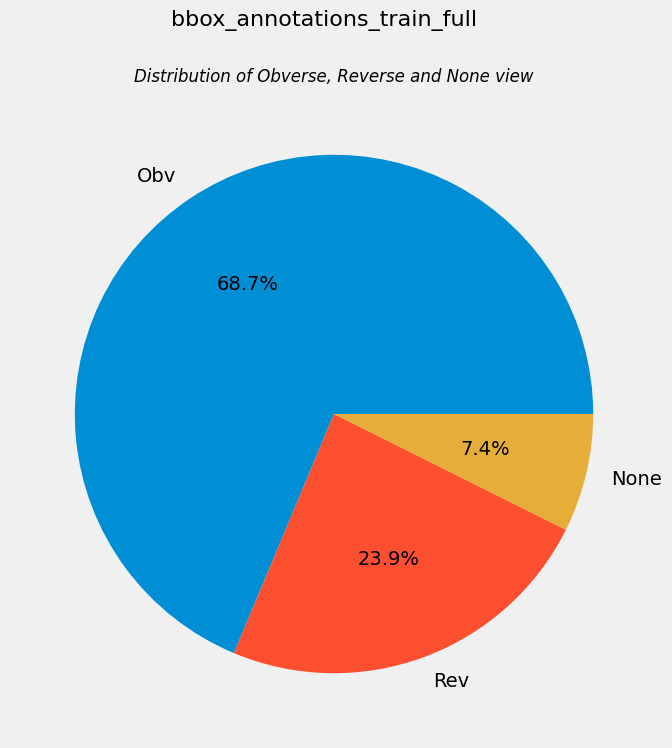

In [41]:
OBV = df_bb_ann_train[df_bb_ann_train['view_desc']=="Obv"]
REV = df_bb_ann_train[df_bb_ann_train['view_desc']=="Rev"]
NONE = df_bb_ann_train[df_bb_ann_train['view_desc'].isnull()]

plt.figure(figsize=(20, 8))

plt.pie([len(OBV), len(REV), len(NONE)], labels=['Obv', 'Rev', 'None'], autopct='%1.1f%%')
plt.suptitle('bbox_annotations_train_full', fontsize=16, x='0.51')
plt.title('Distribution of Obverse, Reverse and None view', style = "italic", fontsize=12)
plt.show()

<p style="text-align: justify; margin-left: 80px; margin-right: 80px;">
La valeur -1 n'étant pas dans les fichiers des segments, il se pourrait qu'il fasse référence à des morceaux qui ne sont pas encore assignés. Pour la suite, il pourra être envisagé de ne pas utiliser ces lignes et les supprimer du fichier si cela est nécessaire, puisqu'ils ne représentent que 7,4% du dataframe, soit 347 symboles.
</p>

<p style="text-align: justify; margin-left: 80px; margin-right: 80px;">--</p>
<p style="text-align: justify; margin-left: 80px; margin-right: 80px;">
Il est important aussi de vérifier que les codes MZL présents dans le dataframe ne sorte pas de la limite du référentiel MZL, autrement dit entre 1 et 907
</p>

In [42]:
invalid_values = df_bb_ann_train[(df_bb_ann_train['mzl_label'] < 1)\
                                  | (df_bb_ann_train['mzl_label'] > 907)]
invalid_values

,segm_idx,tablet_CDLI,view_desc,collection,mzl_label,train_label,bbox,relative_bbox
377,1280,P336635,Obv,saa05,0,0,"[988, 1003, 1079, 1176]","[679, 931, 770, 1104]"


<p style="text-align: justify; margin-left: 80px; margin-right: 80px;">
Le train possède un MZL qui n'est pas référencé, la ligne sera donc supprimée lors de l'import en base pour éviter tout problème.
</p>

<p style="text-align: justify; margin-left: 80px; margin-right: 80px;">
Concernant les symboles, la répartition ne doit pas être uniforme, certains caractères devant être utilisés plus souvent que d'autre, comme c'est le cas en français avec la lettre 'E'.
</p>

In [43]:
sns.countplot(data=df_bb_ann_train, x='mzl_label')

fig = plt.gcf()
fig.set_size_inches(200,50)
plt.show()

In [44]:
fig, axes = plt.subplots(round(len(list_full_tablet_train) / 3), 3, figsize=(80,100))

for i, ax in enumerate(axes.flat):
    if i < len(list_full_tablet_train):
        tablet = list_full_tablet_train[i]
        df = df_bb_ann_train[df_bb_ann_train['tablet_CDLI'] == tablet]
        order = df['mzl_label'].value_counts().index.sort_values()

        sns.countplot(data=df,
                      x='mzl_label',
                      order=order,
                      ax=ax)

        ax.set_title(f'{tablet}')

plt.tight_layout()
plt.show()

<p style="text-align: justify; margin-left: 80px; margin-right: 80px;">
C'est le caractère '𒀀', soit le MZL 839, qui a pour prononciation 'A' que l'on retrouve le plus dans notre dataframe 'bbox_annotation_train_full', avec un peu moins de 350 apparitions dans l'ensemble des tablettes.
</p>

<p style="text-align: justify; margin-left: 80px; margin-right: 80px;">
Il est à noté que la répartition en fonction des tablettes n'est pas uniforme avec certaines tablettes ayant un panel de glyphes importants (ex : P333952, VAT08803Rs, VAT08803Vs...) et d'autre, qui au contraire ne possèdent que 5 ou 7 glyphes différents (P239304, P336660)
</p>

----
#### ---- bbox_annotations_test_full

<p style="text-align: justify; margin-left: 80px; margin-right: 80px;">
L'EDA reprend les mêmes éléments que pour celle du train
</p>

In [11]:
df_bb_ann_test = pd.read_csv('../data/annotations/bbox_annotations_test_full.csv')

In [46]:
df_bb_ann_test.head()

,segm_idx,tablet_CDLI,view_desc,collection,mzl_label,train_label,bbox,relative_bbox
0,8,K08396,Obv,test,252,80,"[910, 738, 978, 787]","[504, 655, 572, 704]"
1,8,K08396,Obv,test,252,80,"[1235, 526, 1296, 571]","[829, 443, 890, 488]"
2,8,K08396,Obv,test,737,100,"[729, 745, 792, 792]","[323, 662, 386, 709]"
3,8,K08396,Obv,test,252,80,"[1161, 573, 1220, 621]","[755, 490, 814, 538]"
4,8,K08396,Obv,test,736,77,"[1121, 425, 1192, 464]","[715, 342, 786, 381]"


In [47]:
df_bb_ann_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3574 entries, 0 to 3573
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   segm_idx       3574 non-null   int64 
 1   tablet_CDLI    3574 non-null   object
 2   view_desc      3574 non-null   object
 3   collection     3574 non-null   object
 4   mzl_label      3574 non-null   int64 
 5   train_label    3574 non-null   int64 
 6   bbox           3574 non-null   object
 7   relative_bbox  3574 non-null   object
dtypes: int64(3), object(5)
memory usage: 223.5+ KB


In [48]:
list_full_tablet_test = np.array(np.unique(df_bb_ann_test['tablet_CDLI']))

print(f"Tablet CDLI (Unique Reference) : {len(list_full_tablet_test)}")
print(f"Tablet CDLI List : {list_full_tablet_test}")

Tablet CDLI (Unique Reference) : 34
Tablet CDLI List : ['BM099070' 'K08396' 'K09237Vs' 'ND02486' 'P334926' 'P334932' 'P335561'
 'P335575' 'P335593' 'P335597' 'P335646' 'P335650' 'P335651' 'P335652'
 'P335653' 'P335937' 'P335940' 'P335941' 'P335946' 'P335949' 'P335957'
 'P335958' 'P335959' 'P335960' 'P335976' 'P335980' 'P336003' 'P336009'
 'P336128' 'P336150' 'P336158' 'P336188' 'P336198' 'P336637']


<p style="text-align: justify; margin-left: 80px; margin-right: 80px;">
Le dataframe 'test' est composé de moins de tablettes, seulement 34 contre 47 dans le train. C'est au total 3574 symboles qui sont présents dans l'ensemble du dataframe.
</p>

<p style="text-align: justify; margin-left: 80px; margin-right: 80px;">
Afin d'éviter des anomalies d'overfitting lors de l'entraînement du modèle, il est essentiel de vérifier que le 'train' et le 'test' ne partage pas de données en commun.
</p>

In [49]:
common_data = set(list_full_tablet_train).intersection(list_full_tablet_test)

if common_data:
    print(f"Data find in two dataframe : {common_data}")
else:
    print("Everything is compliant, no redundant data between 'train' and 'test'.")

Everything is compliant, no redundant data between 'train' and 'test'.


<p style="text-align: justify; margin-left: 80px; margin-right: 80px;">
Les deux ensembles de données ne partagent aucune donnée commune, ce qui, d'une part, prévient l'overfitting, et d'autre part, permet de mélanger les données pour composer un 'train' et un 'test' différent.
</p>

In [50]:
df_bb_ann_test.isnull().sum()

segm_idx         0
tablet_CDLI      0
view_desc        0
collection       0
mzl_label        0
train_label      0
bbox             0
relative_bbox    0
dtype: int64

<p style="text-align: justify; margin-left: 80px; margin-right: 80px;">
À la différence de 'bbox_annotation_train_full', qui présente des valeurs manquantes, 'bbox_annotation_test_full' n'en contient aucune.
</p>

<p style="text-align: justify; margin-left: 80px; margin-right: 80px;">
Vérifions si le test ne comporte pas de label MZL, hors des limites du référentiel comme cela a été le cas avec le train.
</p>

In [51]:
invalid_values = df_bb_ann_test[(df_bb_ann_test['mzl_label'] < 1)\
                                  | (df_bb_ann_test['mzl_label'] > 907)]
invalid_values

,segm_idx,tablet_CDLI,view_desc,collection,mzl_label,train_label,bbox,relative_bbox


<p style="text-align: justify; margin-left: 80px; margin-right: 80px;">
Ici, aucun problème tout est dans la norme du référentiel.
</p>

<p style="text-align: justify; margin-left: 80px; margin-right: 80px;">
Comparons la répartition des glyphes entre le train et le test
</p>

In [117]:
## - Get all mzl_label from both dataset
df_combined = pd.concat([df_bb_ann_train, df_bb_ann_test])
order_mzl = df_combined['mzl_label'].sort_values().unique()

sns.countplot(data=df_bb_ann_train, x='mzl_label', label='train', order=order_mzl)
sns.countplot(data=df_bb_ann_test, x='mzl_label', label='test', order=order_mzl, alpha=0.5)
plt.legend(fontsize='x-large')

fig = plt.gcf()
fig.set_size_inches(200, 80)
plt.show()

<p style="text-align: justify; margin-left: 80px; margin-right: 80px;">
Il est a noté que pour la majorité des glyphes, leur présence dans les deux datasets sont attestés. Cependant, pour certains les glyphes n'apparaissent uniquement dans un des deux, comme par exemple pour le train set : 0, 2, 26, 30, 31... ou pour le test set : 17, 105, 109, 131...
</p>

<p style="text-align: justify; margin-left: 80px; margin-right: 80px;">
Si la recomposition des dataset est effectuée, le ratio pourrait être perdu, il faudra penser à garder une trace de la composition originale des deux set pour faire des tests.
</p>

In [118]:
fig, axes = plt.subplots(round(len(list_full_tablet_test) / 3), 3, figsize=(80,100))

for i, ax in enumerate(axes.flat):
    if i < len(list_full_tablet_test):
        tablet = list_full_tablet_test[i]
        df = df_bb_ann_test[df_bb_ann_test['tablet_CDLI'] == tablet]
        order = df['mzl_label'].value_counts().index.sort_values()

        sns.countplot(data=df,
                      x='mzl_label',
                      order=order,
                      ax=ax)

        ax.set_title(f'{tablet}')

plt.tight_layout()
plt.show()

<p style="text-align: justify; margin-left: 80px; margin-right: 80px;">
Comme pour le train set, le test set comporte la même structure de répartition de glyphes sur les tablettes, certaines ayant un grand nombre de caractères présents, tandis que certaines n'ont que 8 glyphes en tout sur la tablette. Rien a signalé de particulier concernant cela.
</p>

<p style="text-align: justify; margin-left: 80px; margin-right: 80px;">
Avec ce dataset, on peut voir que l'ensemble des glyphes qui est proposé ne concerne pas les 907 glyphes du référentiel MZL. En effet, seulement une partie est disponible, voyons combien au total.
</p>

In [12]:
count_mzl = pd.concat([df_bb_ann_test, df_bb_ann_train, df_bb_ann_test])\
    .drop_duplicates(keep=False)

print(f"Nombre de mzl dans les deux set : {count_mzl['mzl_label'].nunique()}")

print(f"Nombre de mzl dans le test set : {df_bb_ann_test['mzl_label'].nunique()}")
print(f"Nombre de mzl dans le train set : {df_bb_ann_train['mzl_label'].nunique()}")

Nombre de mzl dans les deux set : 262
Nombre de mzl dans le test set : 225
Nombre de mzl dans le train set : 262


<p style="text-align: justify; margin-left: 80px; margin-right: 80px;">
Au total on a donc 262 glyphes sur les 907 du référentiel. Attention, le train et le test set n’ayant pas le même nombre de classes, une erreur sera levée lors de l’entraînement. En effet, la dernière couche sera entraîné sur 262 classes alors que la validation n’aura que 225 classes. Pour éviter le problème, on devra créer un dossier comprenant toutes les données, et réaliser notre propre split.
</p>

<p style="text-align: justify; margin-left: 80px; margin-right: 80px;">
Par ailleurs, dans le futur l’ajout de nouveaux glyphes dans la reconnaissance, demandera une ré-entraînement du modèle. Néanmoins, notons que ces 262 glyphes sont les plus communément utilisés et retrouvés sur les supports écrits. Il est possible que les futurs inférences soient ainsi largement transcrits.
</p>

----
## Résumé

<p style="text-align: justify; margin-left: 40px; margin-right: 80px;">
<b>1- Nettoyage Initial</b></p>
<p style="text-align: justify; margin-left: 80px; margin-right: 80px;">
L'Analyse Exploratoire des Données (EDA) a permis d'effectuer un premier nettoyage des données extraites depuis le repository github, en se concentrant particulièrement sur les dossiers / fichiers. Les dossiers 'Annotations'et 'Segments' seront conservés.
Pour compléter ce premier nettoyage, les fichiers 'line_annotations' et les 'bbox_annotations_train' de A à F, seront supprimés puisqu'ils sont, soit inutiles pour l'avancé du projet, soit redondant avec les données gardées. Les tablettes des fichiers saa05, 06 et 09 étant présent dans les CSV bbox_annotations_train' et 'test', ils seront également supprimés. Même chose pour les fichiers 'tablet_segments_saa' dont les tablettes ne sont pas utilisées dans les fichiers 'bbox_train' et 'bbox_test'.
</p>
</br>
<p style="text-align: justify; margin-left: 40px; margin-right: 80px;">
<b>2- Données Manquantes dans le 'Train Set'</b></p>
<p style="text-align: justify; margin-left: 80px; margin-right: 80px;">
Le 'train set'<em>(bbox_annotations_train_full)</em> présente des valeurs nulles dans la colonne 'view_desc', ne pouvant être liée à un segment particulier des fichiers 'tablet_segments' <em>(dossier 'Segments')</em>. Lors de l'insertion des données en base, nous omettrons les lignes ayant '-1', en valeur, puisque inutilisable en l'état.
</p>
</br>
<p style="text-align: justify; margin-left: 40px; margin-right: 80px;">
<b>3- Différence entre le 'Train Set' et le 'Test Set'</b></p>
<p style="text-align: justify; margin-left: 80px; margin-right: 80px;"> 
Le 'test set' <em>(bbox_annotations_test_full)</em> ne comporte aucune donnée manquante. De plus, il est à noter que les données ne sont pas redondante avec celles du 'train set', ceci permettant d'éviter tout overfitting lors de l'entraînement du modèle.
</p>
</br>
<p style="text-align: justify; margin-left: 40px; margin-right: 80px;">
<b>4- Répartition des Glyphes</b></p>
<p style="text-align: justify; margin-left: 80px; margin-right: 80px;">
La répartition des glyphes entre le 'train' et le 'test set' est homogène. Cependant, la présence exclusive de certains caractères dans l'un des deux set pourrait éventuellement poser des problèmes potentiels lors de l'apprentissage. Cela nécessitera une attention particulière.
</p>
</br>

----

## Prochaines étapes

<p style="text-align: justify; margin-left: 80px; margin-right: 80px;"><b>
- Suppression des fichiers restants : line_annotations, bbox_annotations_train[A-F] et bbox_annotations_saa[05-06-09]
</b></p>

<p style="text-align: justify; margin-left: 80px; margin-right: 80px;"><b>
- Web Scraping des glyphes pour création d'une base de données avec les glyphes, le mzl_label, la transcription et la phonétique
</b></p>

<p style="text-align: justify; margin-left: 80px; margin-right: 80px;"><b>
- EDA des images <a href="notebook_part2_-_EDA_IMAGES.ipynb">second notebook</a>
</b></p>
</br>

-----

## Suppression des fichiers restants

In [ ]:
## - Add line_annotations to list
bbox_csv_list.extend(['../data/annotations/line_annotations_train.csv',
                      '../data/annotations/line_annotations_test.csv',
                      '../data/annotations/bbox_annotations_saa05.csv',
                      '../data/annotations/bbox_annotations_saa06.csv',
                      '../data/annotations/bbox_annotations_saa09.csv',
                      '../data/segments/tablet_segments_saa01.csv',
                      '../data/segments/tablet_segments_saa08.csv',
                      '../data/segments/tablet_segments_saa10.csv',
                      '../data/segments/tablet_segments_saa13.csv',
                      '../data/segments/tablet_segments_saa16.csv'])

## - Delete line_annotations and bbox_annotations_train[A-F]
for file in bbox_csv_list:
    try:
        os.remove(file)
    except Exception as e:
        print(f"Error : {e}")

----
## Webscraping des Glyphes

<p style="text-align: justify; margin-left: 80px; margin-right: 80px;">
Pour la suite du projet, il sera nécessaire d'avoir des informations supplémentaires, qui ne sont pas présents dans les fichiers téléchargés. Pour se faire, un webscraping des glyphes selon leur code MZL a été envisagé. Le site web <em>Electronic Babylonian Library (EBL)</em> est une référence pour ce type de données, c'est donc sur celui-ci que le script récupérera les éléments souhaités.
</p>
<p style="text-align: justify; margin-left: 80px; margin-right: 80px;"><b>
Composition du dictionnaire :
</b></p>
<p style="text-align: justify; margin-left: 100px; margin-right: 80px;">- MZL Code<></p>
<p style="text-align: justify; margin-left: 100px; margin-right: 80px;">- Nom du Glyph</p>
<p style="text-align: justify; margin-left: 100px; margin-right: 80px;">- Glyphes</p>
<p style="text-align: justify; margin-left: 100px; margin-right: 80px;">- Phonetique</p>

<p style="margin-left: 80px; margin-right: 80px;"><em>
Exemple : "mzl_number": 839, "name": "A", "glyph": "𒀀", "phonetic": ["A","a","aia₂","aya₂","barx","burx","dur₅","duru₅","e₄","ea","ebir₃","emx","epir₃","ia₁₀","id₅","ya₁₀","me₅","mu₁₄","sedx"]
</em></p>

In [ ]:
## - WebScraping Script is writing in independant file

%run '../utils/cuneiform_sign_scraper.py'

<p style="text-align: justify; margin-left: 80px; margin-right: 80px;">
Le script permet également de faire ressortir la liste des codes MZL qui n'ont pas d'information. Après un contrôle sur le site, effectivement ceci n'est pas une anomalie, aucun glyphe n'a d'entrée sur ces codes.
</p>
<p style="text-align: justify; margin-left: 80px; margin-right: 80px;">
[48, 58, 189, 276, 325, 370, 423, 473, 520, 529, 534, 604, 607, 624, 626, 654, 656, 657, 658, 664, 680, 697, 716, 717, 718, 757, 822]
</p>

<p style="text-align: justify; margin-left: 80px; margin-right: 80px;">
Une vérification sur ces codes est à faire sur les deux fichiers csv 'bbox_annotations', afin de s'assurer qu'aucun glyphe n'est lié à ces codes, pour éviter des surprises futures.
</p> 

In [5]:
NO_MZL_CODE = [48, 58, 189, 276, 325, 370, 423, 473, 520, 529, 534, 604, 607, 
               624, 626, 654, 656, 657, 658, 664, 680, 697, 716, 717, 718, 757, 822]

df_train = pd.read_csv('../data/annotations/bbox_annotations_train_full.csv')
df_test = pd.read_csv('../data/annotations/bbox_annotations_test_full.csv')

In [8]:
df_train[df_train['mzl_label'].isin(NO_MZL_CODE)]


,segm_idx,tablet_CDLI,view_desc,collection,mzl_label,train_label,bbox,relative_bbox


In [10]:
df_test[df_test['mzl_label'].isin(NO_MZL_CODE)]

,segm_idx,tablet_CDLI,view_desc,collection,mzl_label,train_label,bbox,relative_bbox


<p style="text-align: justify; margin-left: 80px; margin-right: 80px;">
Tout est en ordre, aucun code présent dans les fichiers csv est un des codes MZL n'ont trouvé.
</p> 

----
#
<h2 style="text-align: center;">FIN - NOTEBOOK DATASET</h2>

<p style="text-align: center;">
<a href="notebook_part2_-_EDA_IMAGES.ipynb">Notebook - EDA IMAGES</a>
</p>